In [2]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request

In [9]:
url='https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6'

In [10]:
tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6')

In [11]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")


In [12]:
all_tables=soup.find_all("table")

right_table=soup.find_all("table", class_="wikitable sortable")
actual_table=soup.find_all("tbody")
actual_table[0]

<tbody><tr>
<th>#
</th>
<th>Area<sup class="reference" id="cite_ref-BUA_4-0"><a href="#cite_note-BUA-4">[4]</a></sup><sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[note 1]</a></sup>
</th>
<th>Population<br/>(2011)
</th>
<th>Area (km<sup>2</sup>)<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[note 2]</a></sup>
</th>
<th>Density (People/km<sup>2</sup>)
</th>
<th class="unsortable">Primary sub-divisions<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[note 3]</a></sup>
</th>
<th>Notable changes from 2001 to 2011<sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[5]</a></sup><sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[note 4]</a></sup>
</th></tr>
<tr>
<th>1
</th>
<td><span data-sort-value="London" style="display:none;"></span><a href="/wiki/Greater_London_Built-up_Area" title="Greater London Built-up Area">Greater London</a>
</td>
<td>9,787,426
</td>
<td>1,737.9
</td>
<td>5,630
</td>
<td><a href="/wiki/London_borough

In [13]:
table=soup.find('tbody')
headings=table.findAll('th',text="Area")
headings_list=[i.text for i in headings]
headings_list

[]

In [14]:
values=table.findAll('td')

In [15]:
headings_list

[]

In [16]:
Area=[]
Population=[]
Area_size=[]
Density=[]
Primary_sub_division=[]
Notable_changes_from_2001_to_2011=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        Area.append(cells[0].find(text=True))
        Population.append(cells[1].find(text=True))
        Area_size.append(cells[2].find(text=True))
        Density.append(cells[3].find(text=True))
        Primary_sub_division.append(cells[4].find(text=True))
        Notable_changes_from_2001_to_2011.append(cells[5].find(text=True))

In [17]:
df=pd.DataFrame(Area,columns=['Area'])
df['Population']=Population
df['Area_size']=Area_size
df['Density']=Density
df['Primary_sub_division']=Primary_sub_division
df['Notable_changes_from_2001_to_2011']=Notable_changes_from_2001_to_2011

In [18]:
df['Area_size']=df['Area_size'].str.replace('\n','')


Area_size_data = pd.DataFrame(df['Area_size'])

Area_size_data['City'] = df['Area']
Area_size_data['City'] = Area_size_data['City'].str.replace('Greater ', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('/ Poole', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('-on-Trent', '')
Area_size_data['City'] = Area_size_data['City'].str.replace('/ Dearne Valley', '')
Area_size_data['Area_size'] = Area_size_data['Area_size'].str.replace(',', '')
Area_size_data['Area_size'] = Area_size_data['Area_size'].str.replace('  ', '')

Area_size_data = Area_size_data.drop(11)


In [19]:
Area_size_data['Area_size'] = Area_size_data['Area_size'].astype(float)

In [20]:
data = 'https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/Centre_for_cities_full_data.csv'


In [182]:
dataset = pd.read_csv(data, encoding= 'unicode_escape',error_bad_lines=False)
df = pd.DataFrame(dataset)
df = df[:62]
df.columns = df.columns.str.replace('ï»¿', '')
df.columns = df.columns.str.replace('(ÃÂ£)', '')
df = df.drop(index=[4])
df

,City,Average Weekly Workplace Earnings 2004 (),Average Weekly Workplace Earnings 2005 (),Average Weekly Workplace Earnings 2006 (),Average Weekly Workplace Earnings 2007 (),Average Weekly Workplace Earnings 2008 (),Average Weekly Workplace Earnings 2009 (),Average Weekly Workplace Earnings 2010 (),Average Weekly Workplace Earnings 2011 (),Average Weekly Workplace Earnings 2012 (),...,Youth Claimant Count Feb 2020 (%),Youth Claimant Count Mar 2020 (%),Youth Claimant Count Apr 2020 (%),Youth Claimant Count May 2020 (%),Youth Claimant Count Jun 2020 (%),Youth Claimant Count Jul 2020 (%),Youth Claimant Count Aug 2020 (%),Youth Claimant Count Sep 2020 (%),Youth Claimant Count Oct 2020 (%),Youth Claimant Count Nov 2020 (%)
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,2.95,3.02,4.45,5.53,6.06,6.40,6.53,6.42,6.40,6.30
1,Aldershot,710.3336773,675.3955597,708.9879872,711.1096019,708.7800319,734.1569767,633.7902391,659.8120591,627.2442589,...,1.74,1.74,3.27,5.69,5.93,6.28,6.22,6.20,5.93,5.93
2,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,4.85,5.05,8.03,9.84,9.82,9.93,9.49,9.34,9.16,9.19
3,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,3.75,3.98,6.08,8.96,9.04,9.27,8.85,8.85,8.54,8.68
5,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,5.15,5.25,7.90,9.66,9.61,9.65,9.51,9.51,9.17,9.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Telford,505.751634,474.8717949,505.5137845,528.1173594,513.1205674,479.1666667,465.7334826,452.9474812,462.1085595,...,3.89,4.07,6.95,8.25,8.28,8.46,8.46,8.46,8.25,8.25
58,Wakefield,482.745098,493.2051282,505.2631579,519.3154034,489.5981087,469.0972222,481.8589026,469.6677385,454.8016701,...,4.61,4.82,7.04,9.03,9.03,9.28,8.92,8.95,8.90,8.69
59,Warrington,540.2614379,546.5384615,510.7769424,591.6870416,609.2198582,544.212963,584.0985442,558.7352626,483.7160752,...,2.94,2.94,5.38,6.73,6.71,6.81,6.78,6.78,6.71,6.55
60,Wigan,452.1568627,465.3846154,474.6867168,505.8679707,483.56974,465.0462963,459.6864502,426.6881029,429.5407098,...,4.99,5.22,7.78,9.28,9.15,9.43,9.30,9.14,9.01,8.96


In [183]:
df2 = pd.merge(df, Area_size_data, how='inner')
df2.columns = df2.columns.str.replace(' ', '_')



In [184]:
df2['Density__2015'] = df2['Population_2015'] / df2['Area_size']
df2['Density__2016'] = df2['Population_2016'] / df2['Area_size']
df2['Density__2017'] = df2['Population_2017'] / df2['Area_size']
df2['Density__2018'] = df2['Population_2018'] / df2['Area_size']
df2['Density__2019'] = df2['Population_2019'] / df2['Area_size']
df2

,City,Average_Weekly_Workplace_Earnings_2004__(),Average_Weekly_Workplace_Earnings_2005__(),Average_Weekly_Workplace_Earnings_2006__(),Average_Weekly_Workplace_Earnings_2007__(),Average_Weekly_Workplace_Earnings_2008__(),Average_Weekly_Workplace_Earnings_2009__(),Average_Weekly_Workplace_Earnings_2010__(),Average_Weekly_Workplace_Earnings_2011__(),Average_Weekly_Workplace_Earnings_2012__(),...,Youth_Claimant_Count_Aug_2020__(%),Youth_Claimant_Count_Sep_2020__(%),Youth_Claimant_Count_Oct_2020__(%),Youth_Claimant_Count_Nov_2020__(%),Area_size,Density__2015,Density__2016,Density__2017,Density__2018,Density__2019
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,6.53,6.42,6.40,6.30,69.5,3315.107914,3307.050360,3292.086331,3274.244604,3290.215827
1,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,9.49,9.34,9.16,9.19,59.7,4008.375209,4051.088777,4076.046901,4107.185930,4135.175879
2,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,8.85,8.85,8.54,8.68,37.1,4897.574124,4953.369272,4972.506739,5009.757412,5045.822102
3,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,9.51,9.51,9.17,9.24,88.2,3638.321995,3653.287982,3659.863946,3664.795918,3673.582766
4,Blackburn,507.8431373,463.0769231,465.7894737,461.7359413,473.5224586,478.2407407,496.6405375,463.772776,465.9707724,...,9.49,9.20,9.28,9.34,35.6,4123.595506,4170.224719,4178.932584,4183.764045,4205.056180
5,Blackpool,556.2641117,522.4432655,533.9364035,532.3335418,537.9299811,546.745801,528.2972136,485.5458582,438.052888,...,11.72,11.12,10.94,11.45,61.3,3538.336052,3558.564437,3568.189233,3573.817292,3592.659054
6,Bournemouth,493.1644042,471.4702673,473.5228359,548.0784153,571.3215565,516.7925056,480.464423,480.4229273,464.7098674,...,6.40,6.29,6.02,6.00,131.0,2983.969466,3007.633588,3019.847328,3021.374046,3017.786260
7,Bristol,549.5449578,540.3907204,566.4287965,566.1692381,563.3629338,560.1181948,555.2791323,495.900917,485.5852927,...,5.41,5.39,5.25,5.14,144.4,5013.850416,5073.684211,5112.742382,5166.544321,5183.310249
8,Burnley,433.9335734,433.5657051,462.0121733,435.1416055,472.2494999,427.0195578,444.4523162,417.0232501,448.5712422,...,10.26,10.00,9.76,9.79,35.7,4971.988796,4986.274510,4997.198880,5040.112045,5070.868347
9,Cambridge,587.9738562,564.8717949,577.9448622,595.7212714,719.3853428,626.3888889,571.8924972,565.8092176,562.1085595,...,2.56,2.60,2.49,2.51,42.1,3109.263658,2960.570071,2967.220903,2987.125891,2964.370546


In [185]:
df2.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_UK\Chart2_project_full_dataset.csv')

In [186]:
df2 = df2.drop(df2.index[24])
df2

,City,Average_Weekly_Workplace_Earnings_2004__(),Average_Weekly_Workplace_Earnings_2005__(),Average_Weekly_Workplace_Earnings_2006__(),Average_Weekly_Workplace_Earnings_2007__(),Average_Weekly_Workplace_Earnings_2008__(),Average_Weekly_Workplace_Earnings_2009__(),Average_Weekly_Workplace_Earnings_2010__(),Average_Weekly_Workplace_Earnings_2011__(),Average_Weekly_Workplace_Earnings_2012__(),...,Youth_Claimant_Count_Aug_2020__(%),Youth_Claimant_Count_Sep_2020__(%),Youth_Claimant_Count_Oct_2020__(%),Youth_Claimant_Count_Nov_2020__(%),Area_size,Density__2015,Density__2016,Density__2017,Density__2018,Density__2019
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,6.53,6.42,6.40,6.30,69.5,3315.107914,3307.050360,3292.086331,3274.244604,3290.215827
1,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,9.49,9.34,9.16,9.19,59.7,4008.375209,4051.088777,4076.046901,4107.185930,4135.175879
2,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,8.85,8.85,8.54,8.68,37.1,4897.574124,4953.369272,4972.506739,5009.757412,5045.822102
3,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,9.51,9.51,9.17,9.24,88.2,3638.321995,3653.287982,3659.863946,3664.795918,3673.582766
4,Blackburn,507.8431373,463.0769231,465.7894737,461.7359413,473.5224586,478.2407407,496.6405375,463.772776,465.9707724,...,9.49,9.20,9.28,9.34,35.6,4123.595506,4170.224719,4178.932584,4183.764045,4205.056180
5,Blackpool,556.2641117,522.4432655,533.9364035,532.3335418,537.9299811,546.745801,528.2972136,485.5458582,438.052888,...,11.72,11.12,10.94,11.45,61.3,3538.336052,3558.564437,3568.189233,3573.817292,3592.659054
6,Bournemouth,493.1644042,471.4702673,473.5228359,548.0784153,571.3215565,516.7925056,480.464423,480.4229273,464.7098674,...,6.40,6.29,6.02,6.00,131.0,2983.969466,3007.633588,3019.847328,3021.374046,3017.786260
7,Bristol,549.5449578,540.3907204,566.4287965,566.1692381,563.3629338,560.1181948,555.2791323,495.900917,485.5852927,...,5.41,5.39,5.25,5.14,144.4,5013.850416,5073.684211,5112.742382,5166.544321,5183.310249
8,Burnley,433.9335734,433.5657051,462.0121733,435.1416055,472.2494999,427.0195578,444.4523162,417.0232501,448.5712422,...,10.26,10.00,9.76,9.79,35.7,4971.988796,4986.274510,4997.198880,5040.112045,5070.868347
9,Cambridge,587.9738562,564.8717949,577.9448622,595.7212714,719.3853428,626.3888889,571.8924972,565.8092176,562.1085595,...,2.56,2.60,2.49,2.51,42.1,3109.263658,2960.570071,2967.220903,2987.125891,2964.370546


In [187]:
df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'].astype(float)
df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'] = df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'].astype(float)
df2['average_knowledge'] = (df2['Private_Knowledge_Intensive_Business_Services_2015__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2016__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2017__(%)'] + df2['Private_Knowledge_Intensive_Business_Services_2018__(%)'])/4

In [188]:

df2['Patent_Applications_2015__(per_100,000_of_population)'] = df2['Patent_Applications_2015__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2016__(per_100,000_of_population)'] = df2['Patent_Applications_2016__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2017__(per_100,000_of_population)'] = df2['Patent_Applications_2017__(per_100,000_of_population)'].astype(float)
df2['Patent_Applications_2018__(per_100,000_of_population)'] = df2['Patent_Applications_2018__(per_100,000_of_population)'].astype(float)
df2['average_patents'] = (df2['Patent_Applications_2015__(per_100,000_of_population)'] + df2['Patent_Applications_2016__(per_100,000_of_population)'] + df2['Patent_Applications_2017__(per_100,000_of_population)'] + df2['Patent_Applications_2018__(per_100,000_of_population)'])/4

In [189]:
df2['Business_stock_2015__(per_10,000_population)'] = df2['Business_stock_2015__(per_10,000_population)'].astype(float)
df2['Business_stock_2016__(per_10,000_population)'] = df2['Business_stock_2016__(per_10,000_population)'].astype(float)
df2['Business_stock_2017__(per_10,000_population)'] = df2['Business_stock_2017__(per_10,000_population)'].astype(float)
df2['Business_stock_2018__(per_10,000_population)'] = df2['Business_stock_2018__(per_10,000_population)'].astype(float)
df2['average_business_stock'] = (df2['Business_stock_2015__(per_10,000_population)'] + df2['Business_stock_2016__(per_10,000_population)'] + df2['Business_stock_2017__(per_10,000_population)'] + df2['Business_stock_2018__(per_10,000_population)'])/4

In [85]:
df2['WAP_high_qual_avg'] = (df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2015__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2016__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2017__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2018__(%)'] + df2['Working_Age_Population_with_a_Qualification_at_NVQ4_or_Above_2019__(%)'])/4

In [230]:
df2['GDP_per_worker_2017__()'] = df2['GDP_per_worker_2017__()'].astype(float)

,City,Average_Weekly_Workplace_Earnings_2004__(),Average_Weekly_Workplace_Earnings_2005__(),Average_Weekly_Workplace_Earnings_2006__(),Average_Weekly_Workplace_Earnings_2007__(),Average_Weekly_Workplace_Earnings_2008__(),Average_Weekly_Workplace_Earnings_2009__(),Average_Weekly_Workplace_Earnings_2010__(),Average_Weekly_Workplace_Earnings_2011__(),Average_Weekly_Workplace_Earnings_2012__(),...,Youth_Claimant_Count_Nov_2020__(%),Area_size,Density__2015,Density__2016,Density__2017,Density__2018,Density__2019,average_knowledge,average_patents,average_business_stock
0,Aberdeen,588.7581699,594.6153846,612.7819549,598.2885086,624.7044917,632.8703704,629.4512878,608.7888532,599.8956159,...,6.30,69.5,3315.107914,3307.050360,3292.086331,3274.244604,3290.215827,14.5950,52.026194,410.050075
1,Barnsley,484.9673203,483.3333333,473.8095238,485.3300733,483.6879433,487.3842593,473.7961926,453.6977492,444.8851775,...,9.19,59.7,4008.375209,4051.088777,4076.046901,4107.185930,4135.175879,6.6350,5.656388,256.144527
2,Basildon,601.9607843,600.1282051,585.4636591,590.7090465,590.6619385,570.6018519,523.7402016,538.3708467,495.0939457,...,8.68,37.1,4897.574124,4953.369272,4972.506739,5009.757412,5045.822102,15.7025,14.591418,415.018111
3,Birkenhead,435.5555556,463.8461538,465.6641604,467.4816626,455.2009456,440.9722222,424.0761478,400.5359057,388.9352818,...,9.24,88.2,3638.321995,3653.287982,3659.863946,3664.795918,3673.582766,9.0725,23.175535,274.583104
4,Blackburn,507.8431373,463.0769231,465.7894737,461.7359413,473.5224586,478.2407407,496.6405375,463.772776,465.9707724,...,9.34,35.6,4123.595506,4170.224719,4178.932584,4183.764045,4205.056180,7.7825,10.562205,323.590068
5,Blackpool,556.2641117,522.4432655,533.9364035,532.3335418,537.9299811,546.745801,528.2972136,485.5458582,438.052888,...,11.45,61.3,3538.336052,3558.564437,3568.189233,3573.817292,3592.659054,10.2975,9.443932,320.669100
6,Bournemouth,493.1644042,471.4702673,473.5228359,548.0784153,571.3215565,516.7925056,480.464423,480.4229273,464.7098674,...,6.00,131.0,2983.969466,3007.633588,3019.847328,3021.374046,3017.786260,15.6850,13.793233,416.973878
7,Bristol,549.5449578,540.3907204,566.4287965,566.1692381,563.3629338,560.1181948,555.2791323,495.900917,485.5852927,...,5.14,144.4,5013.850416,5073.684211,5112.742382,5166.544321,5183.310249,17.8450,30.974846,385.176563
8,Burnley,433.9335734,433.5657051,462.0121733,435.1416055,472.2494999,427.0195578,444.4523162,417.0232501,448.5712422,...,9.79,35.7,4971.988796,4986.274510,4997.198880,5040.112045,5070.868347,5.4150,9.565458,301.029251
9,Cambridge,587.9738562,564.8717949,577.9448622,595.7212714,719.3853428,626.3888889,571.8924972,565.8092176,562.1085595,...,2.51,42.1,3109.263658,2960.570071,2967.220903,2987.125891,2964.370546,14.7725,268.725031,393.714548


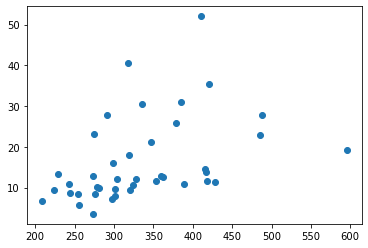

In [229]:
x = df2['average_business_stock'][df2['average_patents'] < 60]
y = df2['average_patents'][df2['average_patents'] < 60]
fig = plt.figure(111)
ax = fig.add_subplot(111)
ax.scatter(x, y)


plt.show() 

In [291]:
df2['Density__2018'] = df2['Density__2018'].astype(float)
var = df2['Density__2018']
lowest = var.quantile(0.25)
med1 = var.quantile(0.5)
med2 = var.quantile(0.75)
conditions = [
    (var < lowest),
    (var >= lowest) & (var < med1),
    (var >= med1) & (var < med2)
    (var >= med2)
]
values = ['lowest', 'med1', 'med2', 'high']
df['filter'] = np.select(conditions, values)

TypeError: 'Series' object is not callable

In [332]:
var = df2['Density__2018']
lowest = var.quantile(0.25)
med1 = var.quantile(0.5)
med2 = var.quantile(0.75)

        

0     4576.421053
1     4576.421053
2     4576.421053
3     4576.421053
4     4576.421053
5     4576.421053
6     4576.421053
7     4576.421053
8     4576.421053
9     4576.421053
10    4576.421053
11    4576.421053
12    4576.421053
13    4576.421053
14    4576.421053
15    4576.421053
16    4576.421053
17    4576.421053
18    4576.421053
19    4576.421053
20    4576.421053
21    4576.421053
22    4576.421053
23    4576.421053
25    4576.421053
26    4576.421053
27    4576.421053
28    4576.421053
29    4576.421053
30    4576.421053
31    4576.421053
32    4576.421053
33    4576.421053
34    4576.421053
35    4576.421053
36    4576.421053
37    4576.421053
38    4576.421053
39    4576.421053
40    4576.421053
41    4576.421053
42    4576.421053
43    4576.421053
44    4576.421053
45    4576.421053
Name: filterw, dtype: float64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [338]:
var = df2['Density__2018']
lowest = var.quantile(0.25)
print(lowest)
med1 = var.quantile(0.5)
med2 = var.quantile(0.75)
df2['filter'] = ''

def f(var):
    if var <= lowest:
        val = 'lowesst'
    elif var <= med1:
        val = 'meds1'
    elif var < med2:
        val = 'meds1'
    else:
        val = 'highs'
df2['filter'] = df2.apply(f, axis=1)


3560.5865102639295


TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [339]:
for index, i in df2['Density__2018'].iteritems():
        if i > med2:
                df2['filter'] == 'higher',
        elif i > med1 & i < med2:
                df2['filter'] == 'med1',
        elif i > lowest & i < med1:
                df2['filter'] == 'med2',
        else:
                df2['filter'] == 'low'


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''